AVIATION RISK ANALYSIS
1. Introduction

a) Problem Statement
Our company is expanding into the purchase and operation of aircraft for commercial and private enterprises as a means of risk diversification. However, the company is currently unaware of the potential risks associated with aircraft operations.

b) Objective
The objective of this project is to identify the aircraft with the lowest associated risks and provide informed recommendations to our company seeking to diversify its portfolio by entering the aviation industry.
c)data 
will use National Transportation Safety Board aviation accident data from 1962 to 2023

2.Data loading
importing necessary libraries wwhich will help in loading and analysing data


In [1]:
#importing necessary libraries which will help in loading and analysing data
import pandas as pd # pandas for data analysis
import numpy as np # numpy for numerical operations
import matplotlib.pyplot as plt # matplotlib.to help in data visualization


In [2]:
#Reading the AviationData CSV file into a DataFrame(df)
#loading data and to check its structure
df = pd.read_csv("AviationData.csv",encoding='ISO-8859-1',low_memory=False)
#just checking in the first few (5) row to see how the data looks like
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#checking the dataset shape  to see the size of data im working with
df.shape
#this means the data has 88889 rows and 31 columns

(88889, 31)

In [4]:
# checking names of the columns I'm working with for easy calling of them if need be
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

3. Data cleaning
   This will involve   checking empty cells,duplicates,wrong data format which might hinder accurate data analysis
   This will ensure our analysis is accurate.

In [5]:
# This is to check any empty cells /missing values
#each column should have 88889 records, if less than there are missing records in that column
# the below code gives a summery information of the data
df.info()
# checking the number of missing values in each column
df.isnull().sum()
#checking isthe percentages of cleaning data
(df.isnull().sum() / len(df)) * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

a.To address missing data:
  For categorical (non-numerical) columns with less than or equal to 30% missing values and deemed important for analysis, the   missing values are replaced with the mode (most frequent value).

  For numerical columns, missing values are also replaced with the mode, since it best represents the most common value    without skewing the data

In [6]:

# Replacing missing values in key categorical columns with their most frequent (mode) values.
# This helps retain useful records while maintaining category consistency across:
# - Location, Country, Injury Severity, Aircraft Damage, Make, Model
# - Engine Type, Purpose of Flight, Weather Condition, Broad Phase of Flight,Report Status,Registration number,Total.Fatal.Injuries,
#-Total.Serious.Injuries and Total.Uninjured
df['Location'].fillna(df['Location'].mode()[0],inplace=True)
df['Country'].fillna(df['Country'].mode()[0],inplace=True)
df['Injury.Severity'].fillna(df['Injury.Severity'].mode()[0],inplace=True)
df['Aircraft.damage'].fillna(df['Aircraft.damage'].mode()[0],inplace=True)
df['Make'].fillna(df['Make'].mode()[0],inplace=True)
df['Model'].fillna(df['Model'].mode()[0],inplace=True)
df['Engine.Type'].fillna(df['Engine.Type'].mode()[0],inplace=True)
df['Purpose.of.flight'].fillna(df['Purpose.of.flight'].mode()[0],inplace=True)
df['Weather.Condition'].fillna(df['Weather.Condition'].mode()[0],inplace=True)
df['Broad.phase.of.flight'].fillna(df['Broad.phase.of.flight'].mode()[0],inplace=True)
df['Report.Status'].fillna(df['Report.Status'].mode()[0],inplace=True)
df['Registration.Number'].fillna(df['Registration.Number'].mode()[0],inplace=True)
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].mode()[0],inplace=True)
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].mode()[0],inplace=True)
df['Total.Uninjured'].fillna(df['Total.Uninjured'].mode()[0],inplace=True)
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].mode()[0],inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_6032\246184560.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna(df['Location'].mode()[0],inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_6032\246184560.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

.b Handling Missing greater than 30% but helful in analysis
For  columns with more than  30% missing values and deemed important for analysis, the   missing values are replaced with the unknown.


In [7]:


df['Airport.Code'].fillna('Unknown', inplace=True)
df['Airport.Name'].fillna('Unknown', inplace=True)
df['Air.carrier'].fillna('Unknown', inplace=True)
df['Broad.phase.of.flight'].fillna('Unknown', inplace=True)
df['Latitude'].fillna('Unknown', inplace=True)
df['Longitude'].fillna('Unknown', inplace=True)
df['Aircraft.Category'].fillna('Unknown', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_6032\1631219783.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Airport.Code'].fillna('Unknown', inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_6032\1631219783.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

b Handling Missing greater than 30% but NOT helful in analysis
For  columns with more than  30% missing values and NOT deemed important for analysis, the   missing values are dropped

In [8]:
#dropping
df.dropna(subset=['Publication.Date'], inplace=True)
df.dropna(subset=['Schedule'], inplace=True)
df.dropna(subset=['FAR.Description'], inplace=True)

In [9]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3297 entries, 5 to 88881
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                3297 non-null   object 
 1   Investigation.Type      3297 non-null   object 
 2   Accident.Number         3297 non-null   object 
 3   Event.Date              3297 non-null   object 
 4   Location                3297 non-null   object 
 5   Country                 3297 non-null   object 
 6   Latitude                3297 non-null   object 
 7   Longitude               3297 non-null   object 
 8   Airport.Code            3297 non-null   object 
 9   Airport.Name            3297 non-null   object 
 10  Injury.Severity         3297 non-null   object 
 11  Aircraft.damage         3297 non-null   object 
 12  Aircraft.Category       3297 non-null   object 
 13  Registration.Number     3297 non-null   object 
 14  Make                    3297 non-null   obje

Event.Id                    0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Location                    0
Country                     0
Latitude                    0
Longitude                   0
Airport.Code                0
Airport.Name                0
Injury.Severity             0
Aircraft.damage             0
Aircraft.Category           0
Registration.Number         0
Make                        0
Model                       0
Amateur.Built               6
Number.of.Engines         617
Engine.Type                 0
FAR.Description             0
Schedule                    0
Purpose.of.flight           0
Air.carrier                 0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Broad.phase.of.flight       0
Report.Status               0
Publication.Date            0
dtype: int64

Duplicates
Duplicate rows are rows that have been registered more than one time
this is to check if our data have any duplicates value which may bring in inconsistences in analysis.

In [10]:
# checking in duplicates  and filtering the duplicated rows only
# as per our output 0*31 means we have no duplicated rows
duplicates=df[df.duplicated()]
duplicates

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [11]:
type_check = df.map(type).nunique()
type_check

Event.Id                  1
Investigation.Type        1
Accident.Number           1
Event.Date                1
Location                  1
Country                   1
Latitude                  1
Longitude                 1
Airport.Code              1
Airport.Name              1
Injury.Severity           1
Aircraft.damage           1
Aircraft.Category         1
Registration.Number       1
Make                      1
Model                     1
Amateur.Built             2
Number.of.Engines         1
Engine.Type               1
FAR.Description           1
Schedule                  1
Purpose.of.flight         1
Air.carrier               1
Total.Fatal.Injuries      1
Total.Serious.Injuries    1
Total.Minor.Injuries      1
Total.Uninjured           1
Weather.Condition         1
Broad.phase.of.flight     1
Report.Status             1
Publication.Date          1
dtype: int64

In [30]:
# converting date column to datetime format  and extract year and month of the event date for easier analysis
df['Event.Date']=pd.to_datetime(df['Event.Date'])# converting date column to datetime
df['Year']=df['Event.Date'].dt.year#Extracting the year
df['Month']=df['Event.Date'].dt.month# extracting the month


DATA ANALYSIS
This will involves analysing our data to understand it better after cleaning.
  a)will check on the statistical summery like mean,quartiles and standard deviation for numerical columns and uniques values and mode for categorical columns.
  b) we will check on the correlationas and relationships 


In [12]:
#checking the statistical summary for numerical 
# this will check for - count, mean, std, min, 25%, 50%, 75%, and max
df.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,2680.000000,3297.000000,3297.000000,3297.000000,3297.000000
mean,1.614552,1.498938,0.683652,0.391568,35.774644
std,0.683849,12.918342,5.374141,2.048523,73.868749
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,2.000000
75%,2.000000,0.000000,0.000000,0.000000,15.000000
max,8.000000,295.000000,161.000000,50.000000,588.000000


In [13]:
# summary for categorical columns
#This will check for count, unique values, top (most frequent value), and freq (its count)
df.select_dtypes(include='object').describe()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,3297,3297,3297,3297,3297,3297,3297,3297,3297,3297,...,3291,3297,3297,3297,3297,3297,3297,3297,3297,3297
unique,3275,2,3294,2483,2170,127,1810,1820,1001,1451,...,2,10,28,3,18,1754,4,12,1335,665
top,20051213X01965,Accident,CEN22LA346,1982-05-29,"Chicago, IL",United States,Unknown,Unknown,Unknown,Unknown,...,No,Reciprocating,135,NSCH,Personal,Unknown,VMC,Landing,Probable Cause,25-09-2020
freq,2,2425,2,6,41,2360,1332,1331,1674,1565,...,3258,1908,726,1570,2482,784,2906,2659,1821,1323


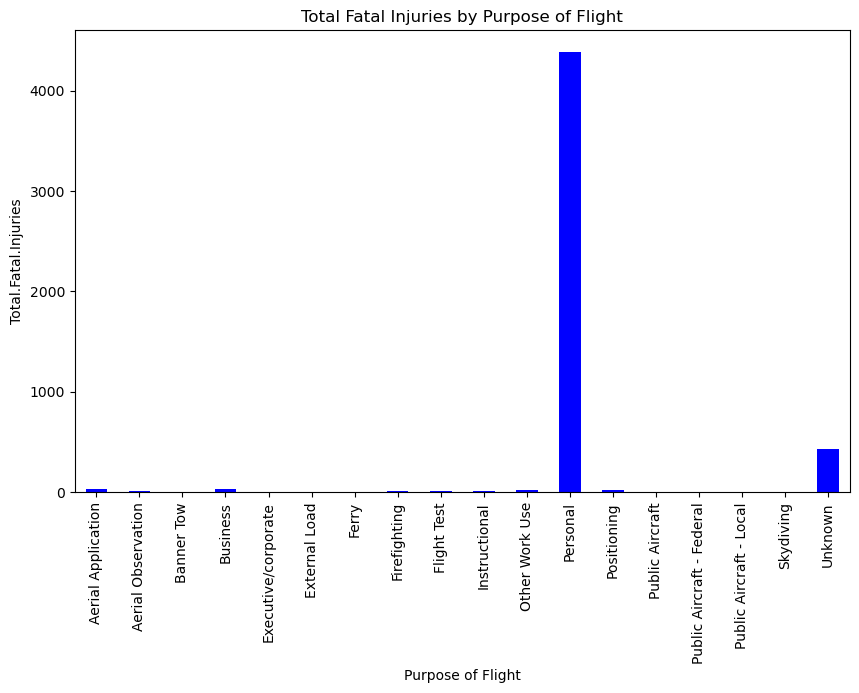

In [53]:
#checking the total fatal injuries if the for personal or business use of the aircraft
# Creating the column name and use transform to calculate total fatal injuries by purpose of flight
df['Fatal_by_purpose'] = df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].transform('sum')
plt.figure(figsize=(10, 6))
df.groupby('Purpose.of.flight')['Fatal_by_purpose'].first().plot(kind='bar', color='blue')  # Plotting the bar chart
plt.title('Total Fatal Injuries by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Total.Fatal.Injuries')
plt.show()

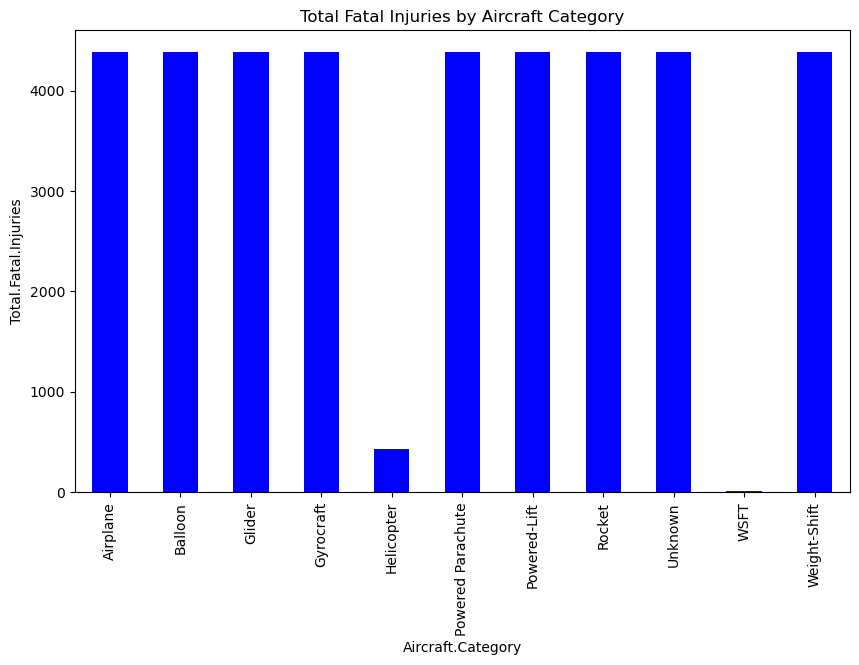

In [54]:
#checking the  number of accidents based on the aircraft model
# Creating the column name and use transform to calculate total fatal injuries by purpose of flight
df['Fatal_by_category'] = df.groupby('Aircraft.Category')['Total.Fatal.Injuries'].transform('sum')
plt.figure(figsize=(10, 6))
df.groupby('Aircraft.Category')['Fatal_by_purpose'].first().plot(kind='bar', color='blue')  # Plotting the bar chart
plt.title('Total Fatal Injuries by Aircraft Category')
plt.xlabel('Aircraft.Category')
plt.ylabel('Total.Fatal.Injuries')
plt.show()

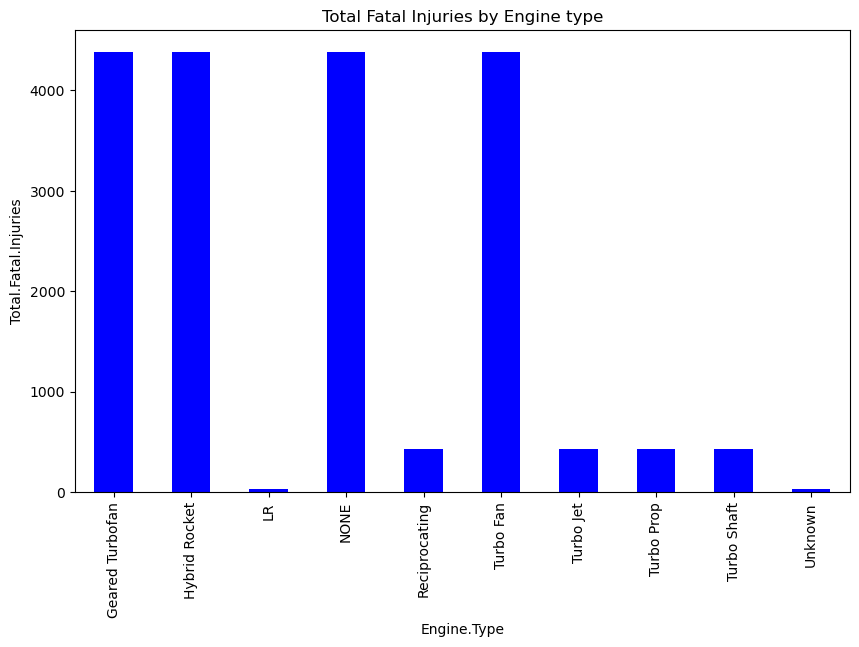

In [57]:
# Checkingthe  number of accidents based on the Engine type
df['Fatal_by_Engine type'] = df.groupby('Aircraft.Category')['Total.Fatal.Injuries'].transform('sum')
plt.figure(figsize=(10, 6))
df.groupby('Engine.Type')['Fatal_by_purpose'].first().plot(kind='bar', color='blue')  # Plotting the bar chart
plt.title('Total Fatal Injuries by Engine type')
plt.xlabel('Engine.Type')
plt.ylabel('Total.Fatal.Injuries')
plt.show()



DATA VISUALIZATION
For the analysis we have done -Purpose of flight,Model,Aircraft category,Engine type vs their coresponding number of total  fatal accidents we visualize them to give out a clear view of its analysis
a)puporse of flight vs total fatal accidents- this will analyze how primary purpose of the flight correlate with total fatal accidents
b)Model vs total Fatal accidents
c) Engine type vs Total fatal accidents
d) Aircraft category vs Total fatl accidents

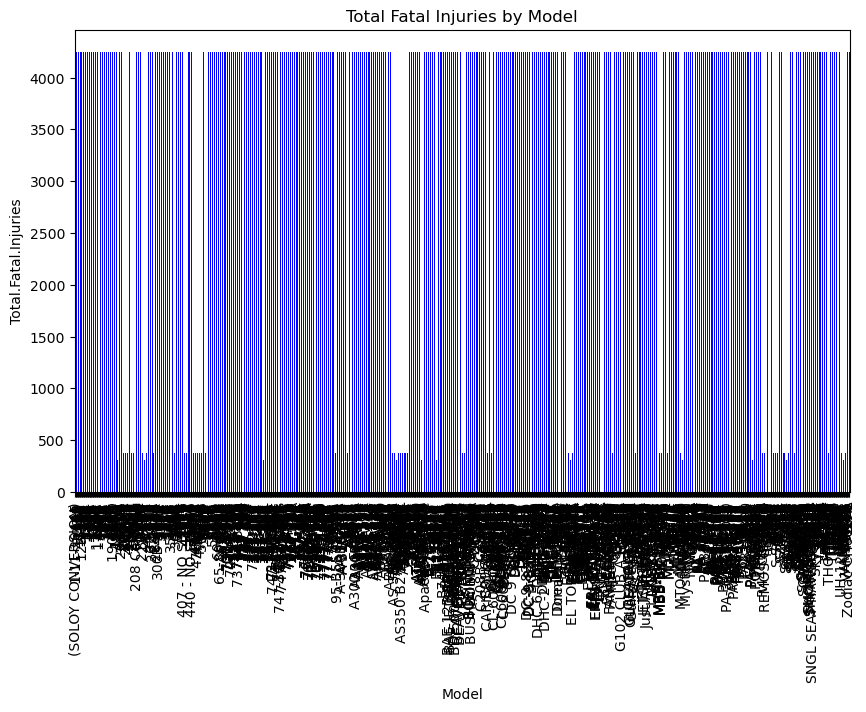

In [59]:
# relationship between Purpose.of.flight vs the total number of total  fatal accidents
df['Fatal_by_model'] = df.groupby('Aircraft.Category')['Total.Fatal.Injuries'].transform('sum')
plt.figure(figsize=(10, 6))
df.groupby('Model')['Fatal_by_model'].first().plot(kind='bar', color='blue')  # Plotting the bar chart
plt.title('Total Fatal Injuries by Model')
plt.xlabel('Model')
plt.ylabel('Total.Fatal.Injuries')
plt.show()